In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('cscpopendata.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107512 entries, 0 to 107511
Data columns (total 22 columns):
CDPHId                    107512 non-null int64
ProductName               107512 non-null object
CSFId                     75254 non-null float64
CSF                       74830 non-null object
CompanyId                 107512 non-null int64
CompanyName               107512 non-null object
BrandName                 107301 non-null object
PrimaryCategoryId         107512 non-null int64
PrimaryCategory           107512 non-null object
SubCategoryId             107512 non-null int64
SubCategory               107512 non-null object
CasId                     107512 non-null int64
CasNumber                 101382 non-null object
ChemicalId                107512 non-null int64
ChemicalName              107512 non-null object
InitialDateReported       107512 non-null object
MostRecentDateReported    107512 non-null object
DiscontinuedDate          12545 non-null object
ChemicalCreated

In [4]:
data['ChemicalCount'].describe()

count    107512.000000
mean          1.286005
std           0.632016
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In [5]:
data.isna().sum()

CDPHId                         0
ProductName                    0
CSFId                      32258
CSF                        32682
CompanyId                      0
CompanyName                    0
BrandName                    211
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6130
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate           94967
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       104607
ChemicalCount                  0
dtype: int64

In [6]:
data.nunique()
#CDPHID is the productid. The unique count is the number of products that has been input in the category

#BUT NOTE THAT may appear more than once if a product has more than one Color/Scent/Flavor, 
##more than one Category, or more than one Chemical Name/CAS number reported.

#But then there's also this Product Name column

## FOR CSF, i would say csfid and csf unique count is different because csf sometimes is just 0, black, etc, which and be the same for other brand but shouldnt be a problem for now

CDPHId                    34908
ProductName               31838
CSFId                     54403
CSF                       32172
CompanyId                   621
CompanyName                 592
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       132
CasNumber                   123
ChemicalId                53564
ChemicalName                122
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
ChemicalCount                 9
dtype: int64

before standardizing data
592 companies reported, these companies earned up to 1m 

In [7]:
data['InitialDateReported'] = data['InitialDateReported'].astype('datetime64')
data['MostRecentDateReported'] = data['MostRecentDateReported'].astype('datetime64')
data['DiscontinuedDate'] = data['DiscontinuedDate'].astype('datetime64')
data['ChemicalCreatedAt'] = data['ChemicalCreatedAt'].astype('datetime64')
data['ChemicalUpdatedAt'] = data['ChemicalUpdatedAt'].astype('datetime64')
data['ChemicalDateRemoved'] = data['ChemicalDateRemoved'].astype('datetime64')

In [116]:
data['PrimaryCategoryId'] = data['PrimaryCategoryId'].astype('str')

THINGS to do 

1. standardize column CompanyName X DONE/ ProductName / CSF/ ChemicalName data and create a new column for it !? 
- convert company's name to all lower case
- replace punctuations like , and . with ''
- replace ' '  with ''
- replace '""' and "''"

2. drop unneccessary columns X DONE
- csfid
- casnumber
- casid
- chemical id
- company id
- subcategory id

3. Change data type from Object to Date x DONE
- InitialDate
- MostRecentdate
- chemical discountinue 
- chemical created at
- chemical updated at
- chemical date removed

4. create a Product column that combine ProductName + CSF so we can now differentiate different color/scent as different products -*Should i do this tho? should I consider them as different products? X DONT DO IT

5. after that for products with same cdphid, make new column as chemical list and combine all chemicals
**let's not do this, just group by the product before graphing/ analyzing it 

IDEAL DF X DONE
- CDPH ID
- csf
- Product name
- Company Name
- Brand name
- primary category id - might need
- Primary Category
- Sub category
- Chemical Name
- Initial Date Reported
- Most Recent Date Reported
- chemical discontinued - can be used to find out the proportion of discontinue/ continue
- chemicalcreated at
- chemical updated at
- chemical date removed - see company that's most remove the chemical
- chemical count 

Things I want to find out
- Category with most frequent report chemicals x done
- subcat with most report chemicals
- most used chemical
- Company with most reported chemical products
- company, category with most chemical count
- mean chemical count 

PROBLEMS
- one product is recorded multiple times if it has more than one Color/Scent/Flavor, more than one Category, or more than one Chemical Name/CAS number reported
- CPHId and Product - why different count

Text(0, 0.5, 'Primary Category')

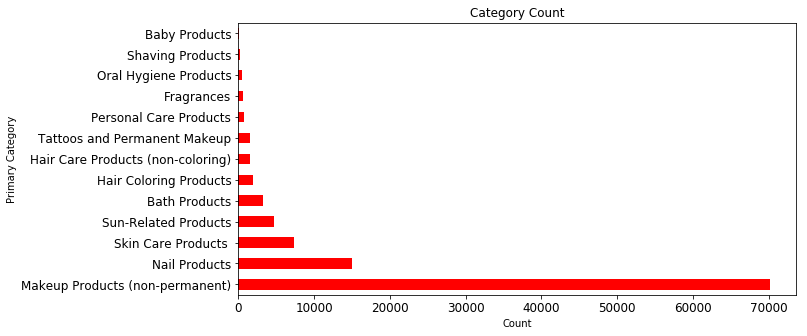

In [8]:
# fig, ax = plt.subplots(figsize = (10,5))
# data['PrimaryCategory'].value_counts().plot(kind='barh', color='r', fontsize =12, title = 'Category Count')
# ax.set_xlabel('Count')
# ax.set_ylabel('Primary Category')


In [45]:
data.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      70119
Nail Products                        14989
Skin Care Products                    7286
Sun-Related Products                  4731
Bath Products                         3271
Hair Coloring Products                1978
Hair Care Products (non-coloring)     1570
Tattoos and Permanent Makeup          1477
Personal Care Products                 751
Fragrances                             643
Oral Hygiene Products                  433
Shaving Products                       221
Baby Products                           43
Name: PrimaryCategory, dtype: int64

In [242]:
data.nunique()

CDPHId                    34908
ProductName               31838
CSFId                     54403
CSF                       32172
CompanyId                   621
CompanyName                 592
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       132
CasNumber                   123
ChemicalId                53564
ChemicalName                122
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
ChemicalCount                 9
dtype: int64

In [246]:
cdata = data[['CDPHId','ProductName', 'CSF', 'CompanyName', 'BrandName','PrimaryCategoryId','PrimaryCategory', 'SubCategory','ChemicalName','ChemicalCount','InitialDateReported','MostRecentDateReported','DiscontinuedDate', 'ChemicalCreatedAt','ChemicalUpdatedAt','ChemicalDateRemoved']]

In [319]:
cdata.CompanyName = cdata.CompanyName.str.lower()
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 590
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [389]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107512 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    107512 non-null int64
ProductName               107512 non-null object
CSF                       74830 non-null object
CompanyName               107512 non-null object
BrandName                 107301 non-null object
PrimaryCategoryId         107512 non-null object
PrimaryCategory           107512 non-null object
SubCategory               107512 non-null object
ChemicalName              107512 non-null object
ChemicalCount             107512 non-null int64
InitialDateReported       107512 non-null datetime64[ns]
MostRecentDateReported    107512 non-null datetime64[ns]
DiscontinuedDate          12545 non-null datetime64[ns]
ChemicalCreatedAt         107512 non-null datetime64[ns]
ChemicalUpdatedAt         107512 non-null datetime64[ns]
ChemicalDateRemoved       2905 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(8)
memory usage: 13

In [337]:
cdata.CompanyName = cdata.CompanyName.str.replace(r'[\,\.,\" "]', '')
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [338]:
cdata

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
1,3,Glover's Medicated Shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
2,3,Glover's Medicated Shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,Revlon Kiss Sugar Scrub Sweet Mint,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Other Makeup Product,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
107508,40660,REVLON COLORSTAY EYELINER GOLD,BLACK,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
107509,40660,REVLON COLORSTAY EYELINER GOLD,BRONZE,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
107510,40660,REVLON COLORSTAY EYELINER GOLD,SILVER,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT


In [463]:
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null int64
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(8)
memory usage: 13

In [475]:
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [464]:
inidate = cdata.InitialDateReported.value_counts()
inidate

2009-10-13    2269
2009-10-08    1781
2009-10-15    1533
2009-10-12    1510
2009-10-07    1507
              ... 
2011-04-20       1
2012-11-01       1
2011-01-06       1
2018-05-19       1
2012-03-04       1
Name: InitialDateReported, Length: 2120, dtype: int64

In [465]:
mrdate = cdata.MostRecentDateReported.value_counts()
mrdate

2010-12-30    15889
2019-02-01      891
2016-09-21      852
2018-10-16      724
2013-09-16      677
              ...  
2018-11-07        1
2010-09-28        1
2012-03-28        1
2009-08-24        1
2011-02-07        1
Name: MostRecentDateReported, Length: 2026, dtype: int64

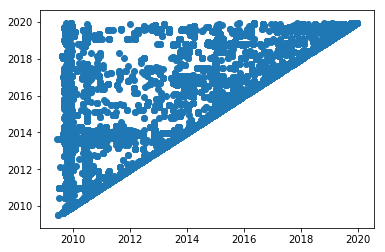

In [466]:
plt.scatter(cdata['InitialDateReported'], cdata['MostRecentDateReported'])

In [467]:
cdata.groupby(['PrimaryCategory']).count()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
PrimaryCategory,,,,,,,,,,,,,,,
Baby Products,43,43,2,43,43,43,43,43,43,43,43,11,43,43,3
Bath Products,3231,3231,966,3231,3220,3231,3231,3231,3231,3231,3231,514,3231,3231,274
Fragrances,621,621,248,621,621,621,621,621,621,621,621,118,621,621,65
Hair Care Products (non-coloring),1516,1516,161,1516,1492,1516,1516,1516,1516,1516,1516,287,1516,1516,206
Hair Coloring Products,1725,1725,1104,1725,1724,1725,1725,1725,1725,1725,1725,426,1725,1725,16
Makeup Products (non-permanent),64574,64574,52721,64574,64465,64574,64574,64574,64574,64574,64574,7654,64574,64574,1462
Nail Products,14371,14371,7106,14371,14371,14371,14371,14371,14371,14371,14371,745,14371,14371,212
Oral Hygiene Products,431,431,1,431,431,431,431,431,431,431,431,25,431,431,14
Personal Care Products,739,739,318,739,739,739,739,739,739,739,739,254,739,739,94


In [471]:
cgroup = cdata.groupby(['CDPHId'])
cgroup = cgroup.first()
cgroup

,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
CDPHId,,,,,,,,,,,,,,,
2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
3,Glover's Medicated Shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40655,CREATIVE NAIL DESIGN SHELLAC NAIL ENAMEL DARK ...,CITYSCAPE,revlonconsumerproductcorporation,Creative Nail Design,59,Nail Products,Nail Polish and Enamel,Carbon black,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
40657,Creative Nail Design Shellac Nail Enamel CANDIED,ROMANTIQUE,revlonconsumerproductcorporation,Creative Nail Design,59,Nail Products,Nail Polish and Enamel,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
40658,Revlon Glow Balm PeonyGlow,Lily Glow,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Lip Balm (making a cosmetic claim),Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT


In [470]:
cgroup.info()
#for Cgroup, can't use chemical name / any chem realted column except chemcount since it's only showing first chemname in group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34908 entries, 2 to 40660
Data columns (total 15 columns):
ProductName               34908 non-null object
CSF                       8784 non-null object
CompanyName               34908 non-null object
BrandName                 34838 non-null object
PrimaryCategoryId         34908 non-null object
PrimaryCategory           34908 non-null object
SubCategory               34908 non-null object
ChemicalName              34908 non-null object
ChemicalCount             34908 non-null int64
InitialDateReported       34908 non-null datetime64[ns]
MostRecentDateReported    34908 non-null datetime64[ns]
DiscontinuedDate          4374 non-null datetime64[ns]
ChemicalCreatedAt         34908 non-null datetime64[ns]
ChemicalUpdatedAt         34908 non-null datetime64[ns]
ChemicalDateRemoved       1234 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(8)
memory usage: 4.3+ MB


In [476]:
cgroup.isnull().sum()

ProductName                   0
CSF                       26124
CompanyName                   0
BrandName                    70
PrimaryCategoryId             0
PrimaryCategory               0
SubCategory                   0
ChemicalName                  0
ChemicalCount                 0
InitialDateReported           0
MostRecentDateReported        0
DiscontinuedDate          30534
ChemicalCreatedAt             0
ChemicalUpdatedAt             0
ChemicalDateRemoved       33674
dtype: int64

In [477]:
cgroup.nunique()

ProductName               31838
CSF                        5704
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                105
ChemicalCount                 9
InitialDateReported        2119
MostRecentDateReported     2018
DiscontinuedDate            964
ChemicalCreatedAt          2124
ChemicalUpdatedAt          2133
ChemicalDateRemoved         496
dtype: int64

4374 of the products reported were discontinued
4374/34908 ~ 12.5%

In [474]:
cgroup.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      16796
Nail Products                         6702
Skin Care Products                    4778
Bath Products                         2185
Hair Care Products (non-coloring)     1201
Sun-Related Products                   836
Hair Coloring Products                 794
Fragrances                             427
Personal Care Products                 402
Oral Hygiene Products                  310
Tattoos and Permanent Makeup           263
Shaving Products                       175
Baby Products                           39
Name: PrimaryCategory, dtype: int64

In [348]:
cat_percent = cgroup.PrimaryCategory.value_counts()*100/34908
cat_percent

Makeup Products (non-permanent)      48.115045
Nail Products                        19.199037
Skin Care Products                   13.687407
Bath Products                         6.259310
Hair Care Products (non-coloring)     3.440472
Sun-Related Products                  2.394867
Hair Coloring Products                2.274550
Fragrances                            1.223215
Personal Care Products                1.151598
Oral Hygiene Products                 0.888049
Tattoos and Permanent Makeup          0.753409
Shaving Products                      0.501318
Baby Products                         0.111722
Name: PrimaryCategory, dtype: float64

In [349]:
s = cat_percent.to_frame().reset_index()
s = s.rename(columns = {'PrimaryCategory':'Percent'})
s
##IMPORTANT INFO

,index,Percent
0,Makeup Products (non-permanent),48.115045
1,Nail Products,19.199037
2,Skin Care Products,13.687407
3,Bath Products,6.259310
4,Hair Care Products (non-coloring),3.440472
5,Sun-Related Products,2.394867
6,Hair Coloring Products,2.274550
7,Fragrances,1.223215
8,Personal Care Products,1.151598
9,Oral Hygiene Products,0.888049


Text(0.5, 1.0, 'Primary Category Reported Percentage')

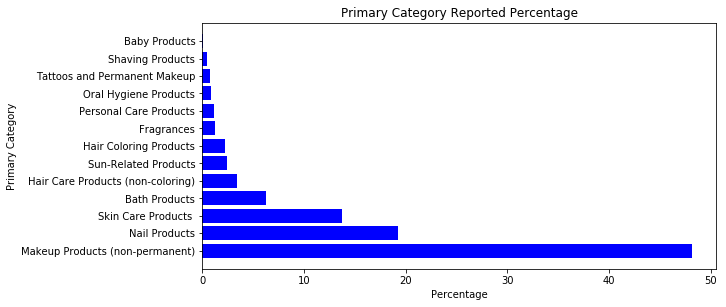

In [350]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(s['index'], s['Percent'], color='b')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Percentage')
plt.title('Primary Category Reported Percentage')


# Makeup Products (non-permanent)	48.115045
# Nail Products	19.199037
# Skin Care Products	13.687407

In [ ]:
#what is the most used chemicals in make up category

In [478]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null int64
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(8)
memory usage: 13

In [361]:
cdata[cdata['PrimaryCategoryId']=='44'].groupby(['ChemicalName']).count().sort_values(['CDPHId'], ascending=False)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
ChemicalName,,,,,,,,,,,,,,,
Titanium dioxide,60008,60008,49652,60008,59901,60008,60008,60008,60008,60008,60008,7080,60008,60008,1175
Mica,1610,1610,1142,1610,1609,1610,1610,1610,1610,1610,1610,334,1610,1610,19
"Silica, crystalline (airborne particles of respirable size)",1594,1594,1357,1594,1594,1594,1594,1594,1594,1594,1594,30,1594,1594,111
Butylated hydroxyanisole,1530,1530,1442,1530,1530,1530,1530,1530,1530,1530,1530,77,1530,1530,4
Talc,1301,1301,1207,1301,1300,1301,1301,1301,1301,1301,1301,8,1301,1301,17
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",896,896,818,896,896,896,896,896,896,896,896,244,896,896,57
Retinyl palmitate,716,716,552,716,716,716,716,716,716,716,716,13,716,716,19
Carbon black,579,579,482,579,579,579,579,579,579,579,579,28,579,579,3
"Mineral oils, untreated and mildly treated",334,334,156,334,334,334,334,334,334,334,334,144,334,334,0


In [479]:
c = cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts()*100/100633
c = c.to_frame().reset_index()
c = c.rename(columns={'ChemicalName':'Percentage'})
c
#chemical in MAKE UP NONPERMANENT category


,index,Percentage
0,Titanium dioxide,55.267159
1,Mica,1.519382
2,"Silica, crystalline (airborne particles of res...",1.288842
3,Talc,1.279898
4,Butylated hydroxyanisole,0.943031
5,"Retinol/retinyl esters, when in daily dosages ...",0.828754
6,Retinyl palmitate,0.668767
7,Carbon black,0.541572
8,"Mineral oils, untreated and mildly treated",0.329912
9,Vitamin A palmitate,0.301094


Text(0, 0.5, 'Frequency')

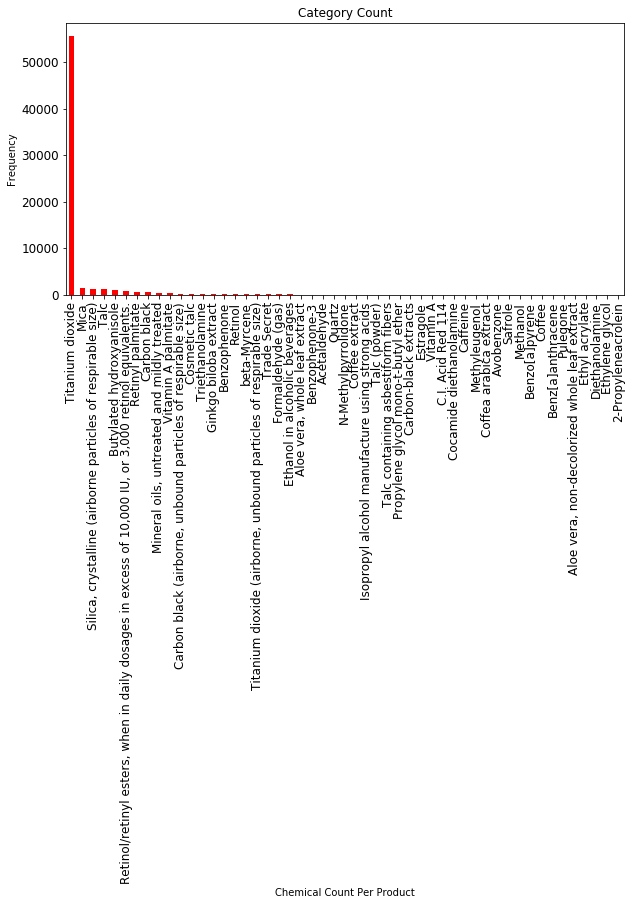

In [480]:
fig, ax = plt.subplots(figsize = (10,5))
cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Category Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

In [ ]:
#plot bar graph of each category and stack the chemicals used in each bar***

In [488]:
pivot_df = cdata.pivot_table(index='PrimaryCategory', columns='ChemicalName', values='CDPHId', aggfunc='count')
pivot_df

ChemicalName,"1,4-Dioxane","2,2-Bis(bromomethyl)-1,3-propanediol","2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)",2-Propyleneacrolein,Acetaldehyde,"Acetic acid, retinyl ester",Acetylsalicylic acid,Acrylamide,All-trans retinoic acid,"Aloe vera, non-decolorized whole leaf extract",...,Trade Secret,Trichloroacetic acid,Triethanolamine,Vinyl acetate,Vitamin A,Vitamin A palmitate,beta-Myrcene,o-Phenylenediamine and its salts,o-Phenylphenol,p-Aminodiphenylamine
PrimaryCategory,,,,,,,,,,,,,,,,,,,,,
Baby Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bath Products,14.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,...,19.0,NaN,30.0,NaN,NaN,57.0,1.0,NaN,NaN,NaN
Fragrances,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
Hair Care Products (non-coloring),39.0,NaN,NaN,NaN,12.0,NaN,NaN,1.0,4.0,NaN,...,76.0,NaN,26.0,1.0,NaN,37.0,NaN,NaN,NaN,NaN
Hair Coloring Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210.0,NaN,13.0,NaN,NaN,1.0,NaN,9.0,8.0,2.0
Makeup Products (non-permanent),NaN,NaN,NaN,1.0,28.0,NaN,NaN,NaN,NaN,1.0,...,45.0,NaN,102.0,NaN,6.0,303.0,59.0,NaN,NaN,NaN
Nail Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,NaN,2.0,NaN,NaN,4.0,5.0,NaN,NaN,NaN
Oral Hygiene Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Care Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,20.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN


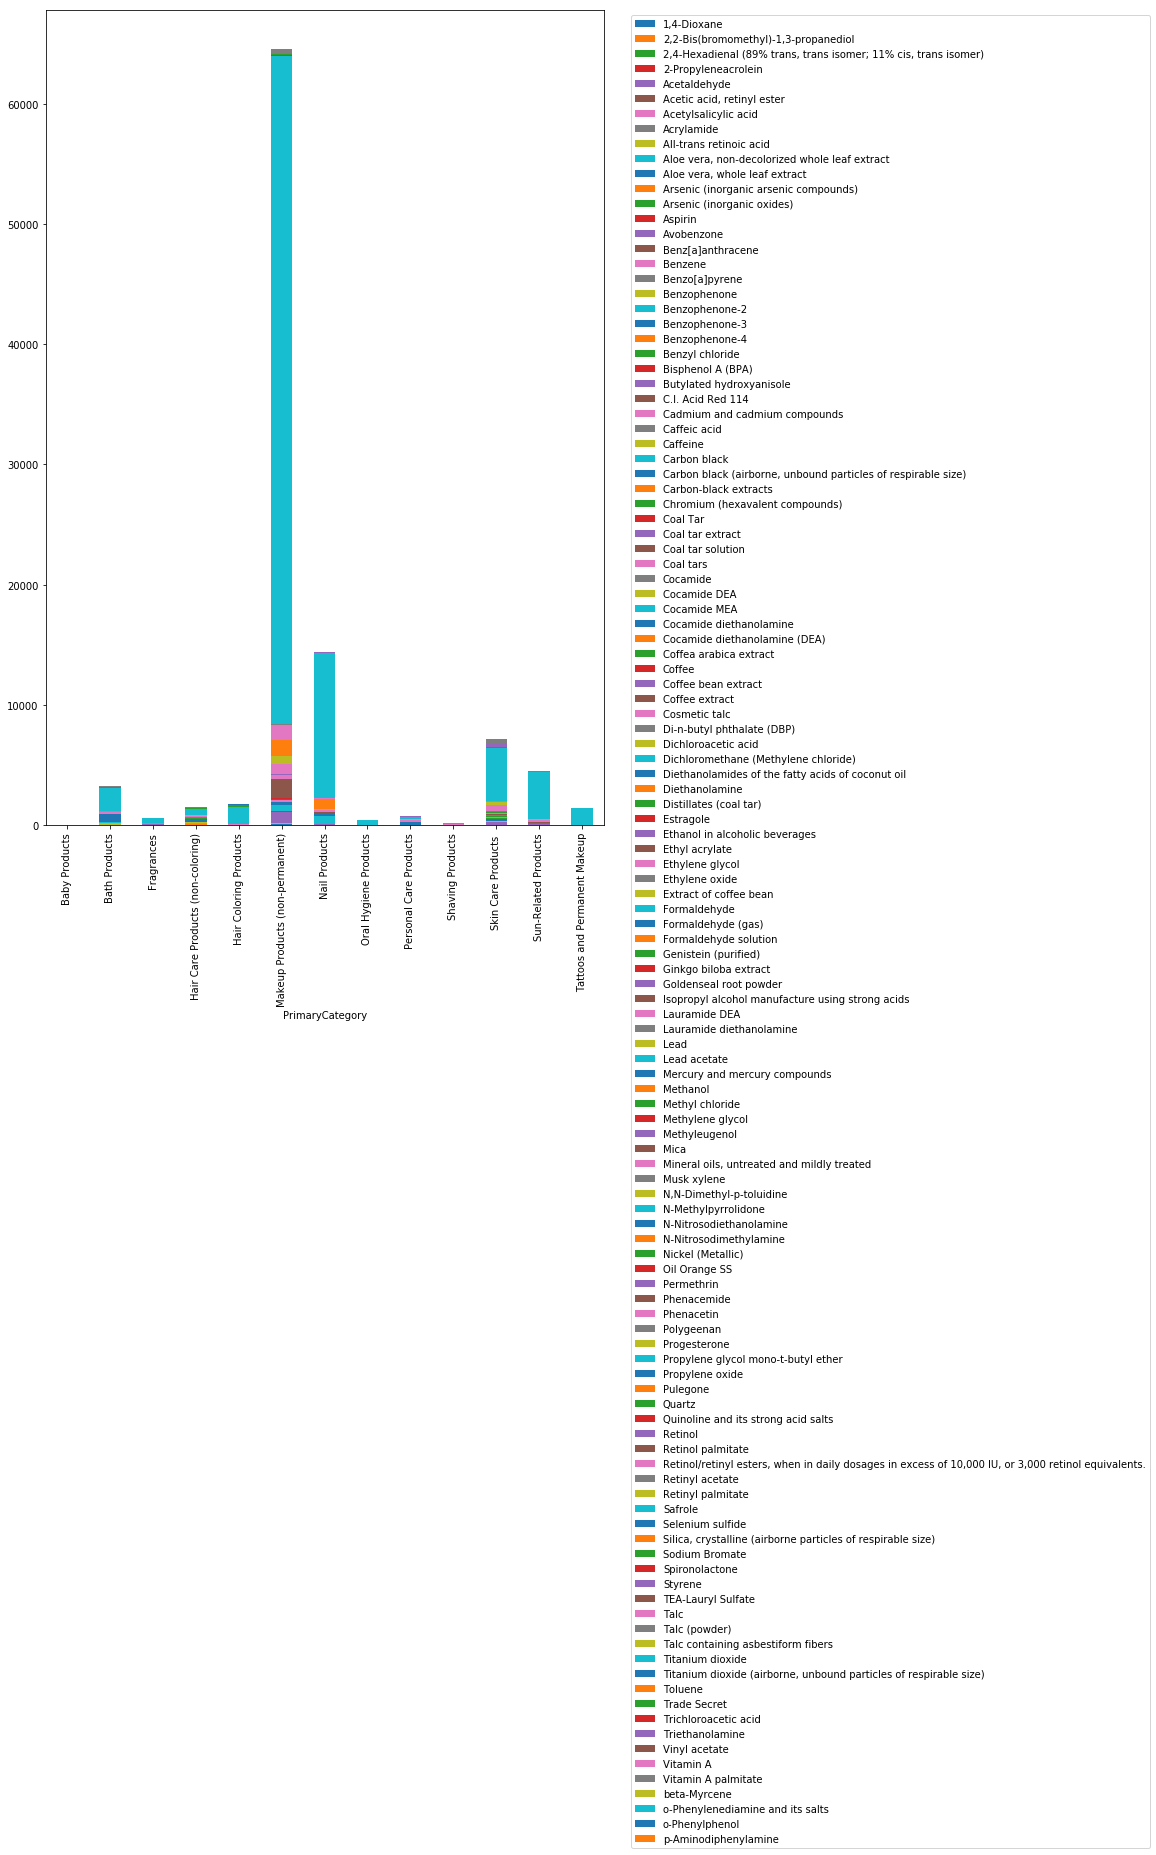

In [496]:
pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
#then split chemical into groups - Titanium dioxide & Others

In [141]:
## cgroup = cgroup.drop(columns =['PrimaryCatRatio'])

In [253]:
cgroup

,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
CDPHId,,,,,,,,,,,,,,,
2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
3,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40655,CREATIVE NAIL DESIGN SHELLAC NAIL ENAMEL DARK ...,CITYSCAPE,Revlon Consumer Product Corporation,Creative Nail Design,59,Nail Products,Nail Polish and Enamel,Carbon black,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
40657,Creative Nail Design Shellac Nail Enamel CANDIED,ROMANTIQUE,Revlon Consumer Product Corporation,Creative Nail Design,59,Nail Products,Nail Polish and Enamel,Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT
40658,Revlon Glow Balm PeonyGlow,Lily Glow,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),Lip Balm (making a cosmetic claim),Titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT


In [ ]:
#NOTE: cgroup only shows the first chem used in the product
#don't use
cgroup[cgroup['PrimaryCategoryId']=='44'].groupby(['ChemicalName']).count().sort_values(['ProductName'], ascending=False)

In [123]:
cgroup.PrimaryCategory.value_counts().sum()

34908

Text(0, 0.5, 'Primary Category')

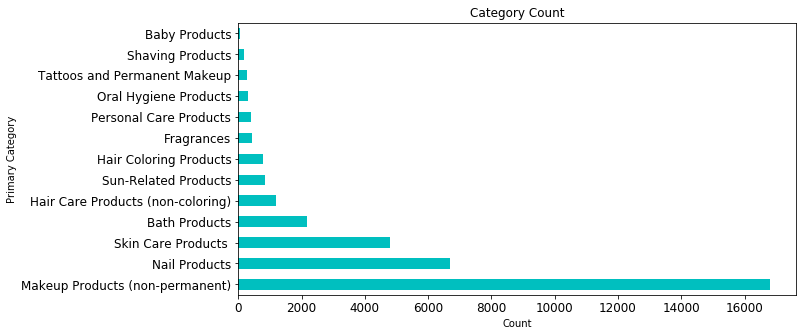

In [96]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
ax.set_xlabel('Count')
ax.set_ylabel('Primary Category')

Text(0, 0.5, 'Primary Category')

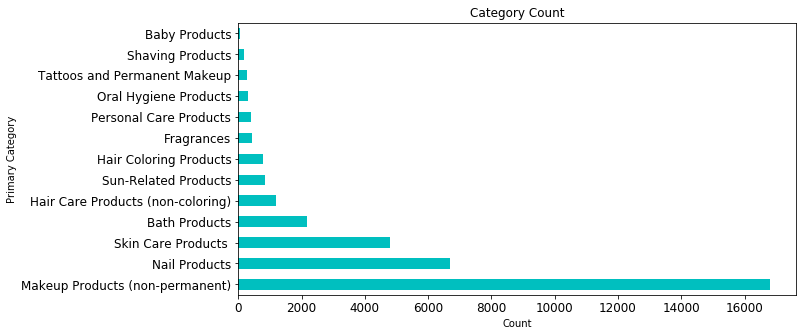

In [147]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
ax.set_xlabel('Count')
ax.set_ylabel('Primary Category')

Text(0, 0.5, 'Frequency')

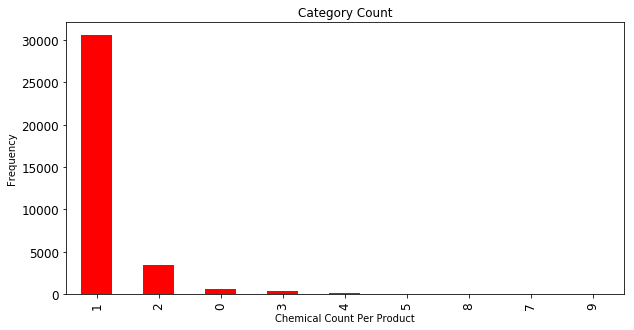

In [100]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['ChemicalCount'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Category Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

In [390]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107512 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    107512 non-null int64
ProductName               107512 non-null object
CSF                       74830 non-null object
CompanyName               107512 non-null object
BrandName                 107301 non-null object
PrimaryCategoryId         107512 non-null object
PrimaryCategory           107512 non-null object
SubCategory               107512 non-null object
ChemicalName              107512 non-null object
ChemicalCount             107512 non-null int64
InitialDateReported       107512 non-null datetime64[ns]
MostRecentDateReported    107512 non-null datetime64[ns]
DiscontinuedDate          12545 non-null datetime64[ns]
ChemicalCreatedAt         107512 non-null datetime64[ns]
ChemicalUpdatedAt         107512 non-null datetime64[ns]
ChemicalDateRemoved       2905 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(8)
memory usage: 13

In [395]:
cdata['ChemicalName'].value_counts()*100/107512
#chemical overall

Titanium dioxide                                                                                       81.395565
Silica, crystalline (airborne particles of respirable size)                                             2.400662
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     1.993266
Butylated hydroxyanisole                                                                                1.719808
Mica                                                                                                    1.637957
                                                                                                         ...    
Cocamide diethanolamine (DEA)                                                                           0.000930
Extract of coffee bean                                                                                  0.000930
Sodium Bromate                                                                                  

In [391]:
cgroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34908 entries, 2 to 40660
Data columns (total 15 columns):
ProductName               34908 non-null object
CSF                       8784 non-null object
CompanyName               34908 non-null object
BrandName                 34838 non-null object
PrimaryCategoryId         34908 non-null object
PrimaryCategory           34908 non-null object
SubCategory               34908 non-null object
ChemicalName              34908 non-null object
ChemicalCount             34908 non-null int64
InitialDateReported       34908 non-null datetime64[ns]
MostRecentDateReported    34908 non-null datetime64[ns]
DiscontinuedDate          4374 non-null datetime64[ns]
ChemicalCreatedAt         34908 non-null datetime64[ns]
ChemicalUpdatedAt         34908 non-null datetime64[ns]
ChemicalDateRemoved       1234 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(8)
memory usage: 4.3+ MB


In [159]:
# cgroup['ChemicalName'].value_counts()*100/34908

##this one does not give meaningful insights since some of ~4000 of the products has more than one chemical. 
#cgroup shows one chem per product

Titanium dioxide                                                                                       81.542913
Cocamide diethanolamine                                                                                 2.397731
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     1.761774
Silica, crystalline (airborne particles of respirable size)                                             1.555517
Talc                                                                                                    1.271915
                                                                                                         ...    
N-Nitrosodiethanolamine                                                                                 0.002865
Cadmium and cadmium compounds                                                                           0.002865
Lauramide diethanolamine                                                                        

In [287]:
cgroup[cgroup.ChemicalName.value_counts()>100]

/Users/suchaya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [402]:
#total of 584 companies reported
#total of 34908 reported products
comp = cgroup.CompanyName.value_counts()*100/34908
comp = comp.to_frame().reset_index()
comp = comp.rename(columns = {'CompanyName':'Percentage'})
comp

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailallianceentity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
579,gurwitchproducts,0.002865
580,generalmotors,0.002865
581,radiance,0.002865
582,cardinalhealth,0.002865


Text(0, 0.5, 'Count')

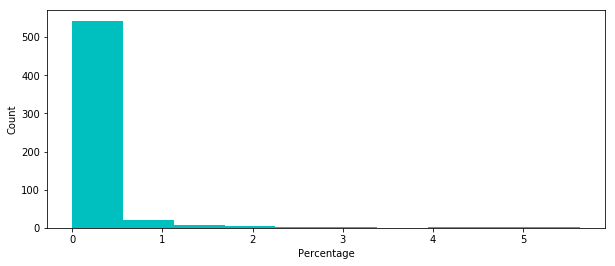

In [429]:
plt.subplots(figsize=(10,4))
plt.hist(comp.Percentage, color='c')
plt.xlabel('Percentage')
plt.ylabel('Count')

In [419]:
comp[comp.Percentage >= 1]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailallianceentity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
5,buthnabodhaigeinc,2.962072
6,theprocter&gamblecompany,2.394867
7,anastasiabeverlyhillsllc,2.360490
8,hand&nailharmonyinc,2.165693
9,victoria'ssecretbeauty,2.128452


In [418]:
comp[comp.Percentage > comp.Percentage.mean()]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailallianceentity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
101,sunpharmaceuticalsllc,0.180474
102,olympicmountainproducts,0.177610
103,thehaincelestialgroupinc,0.174745
104,beautysolutionsltd,0.174745


In [411]:
comp[comp.Percentage > comp.Percentage.median()]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailallianceentity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
275,maxhuberresearchlabsinc,0.025782
276,riteaidcorporation,0.025782
277,greatclipsinc,0.025782
278,aplicareinc,0.025782


In [415]:
comp[comp.Percentage > comp.Percentage.quantile(0.90)]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailallianceentity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
5,buthnabodhaigeinc,2.962072
6,theprocter&gamblecompany,2.394867
7,anastasiabeverlyhillsllc,2.360490
8,hand&nailharmonyinc,2.165693
9,victoria'ssecretbeauty,2.128452


In [128]:
datag = data.groupby(['CDPHId'])
datag = datag.head()
datag
## to fix this, probably should make a small subset of dataframe first

#NOTE if data.groupby(['ProductName']).count() will get total of 31838 products reported
#, each product has different colors/scent/flavor but we'll treat them as 1 product for now
#this number is equal to unique product name (for now)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,Revlon Kiss Sugar Scrub Sweet Mint,NaN,NaN,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),58,...,13463-67-7,66554,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107508,40660,REVLON COLORSTAY EYELINER GOLD,63206.0,BLACK,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107509,40660,REVLON COLORSTAY EYELINER GOLD,63207.0,BRONZE,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107510,40660,REVLON COLORSTAY EYELINER GOLD,63208.0,SILVER,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1


In [ ]:
#plot chemical used in each category
#using stacked bar chart

In [ ]:
#plot chemical used in make up category

In [133]:
datag[datag['PrimaryCategoryId'] == '44']#['ProductName']

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
30,18,SPECTRA LASH MASCARA �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),162,...,13463-67-7,24,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,Revlon Kiss Sugar Scrub Sweet Mint,NaN,NaN,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),58,...,13463-67-7,66554,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107508,40660,REVLON COLORSTAY EYELINER GOLD,63206.0,BLACK,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107509,40660,REVLON COLORSTAY EYELINER GOLD,63207.0,BRONZE,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107510,40660,REVLON COLORSTAY EYELINER GOLD,63208.0,SILVER,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1


In [72]:
datag.PrimaryCategory.value_counts().sum()

60629

In [49]:
datag.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      33121
Nail Products                         8694
Skin Care Products                    6188
Bath Products                         2667
Sun-Related Products                  2304
Hair Care Products (non-coloring)     1401
Hair Coloring Products                1047
Fragrances                             574
Personal Care Products                 497
Oral Hygiene Products                  414
Tattoos and Permanent Makeup           226
Shaving Products                       218
Baby Products                           43
Name: PrimaryCategory, dtype: int64

Text(0, 0.5, 'Primary Category')

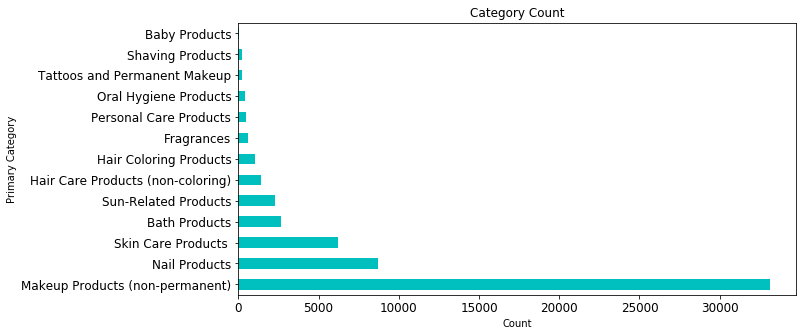

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
datag['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
ax.set_xlabel('Count')
ax.set_ylabel('Primary Category')

In [12]:
datag1 = data.groupby(['ProductName','CSFId']).head()
datag1
#don't use this

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107506,40658,Revlon Glow Balm PeonyGlow,63205.0,Lily Glow,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),51,...,13463-67-7,66553,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107508,40660,REVLON COLORSTAY EYELINER GOLD,63206.0,BLACK,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107509,40660,REVLON COLORSTAY EYELINER GOLD,63207.0,BRONZE,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107510,40660,REVLON COLORSTAY EYELINER GOLD,63208.0,SILVER,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1


In [13]:
datag2 = data.groupby(['ProductName','CSF']).head()
datag2
# #don't use this

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107506,40658,Revlon Glow Balm PeonyGlow,63205.0,Lily Glow,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),51,...,13463-67-7,66553,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107508,40660,REVLON COLORSTAY EYELINER GOLD,63206.0,BLACK,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107509,40660,REVLON COLORSTAY EYELINER GOLD,63207.0,BRONZE,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107510,40660,REVLON COLORSTAY EYELINER GOLD,63208.0,SILVER,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1


from above graph, make up products made up most of the data set. Let's tale a deeper look at it
- subcategory
- Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils, Face Powders, Foundations and Bases, Lip Balm (making a cosmetic claim), Lip Color - Lipsticks, Liners, and Pencils, Lip Gloss/Shine, Makup Fixatives, Makeup Preparations, Mascara/Eyelash Products, Paints (e.g. facial, body), Rouges, Other Makeup Product

In [14]:
makeup_sub = ['Blushes', 'Eye Shadow', 'Eyeliner/Eyebrow Pencils', 'Face Powders', 'Foundations and Bases', 'Lip Balm (making a cosmetic claim)', 'Lip Color - Lipsticks, Liners, and Pencils', 'Lip Gloss/Shine', 'Makup Fixatives', 'Makeup Preparations', 'Mascara/Eyelash Products', 'Paints (e.g. facial, body)', 'Rouges', 'Other Makeup Product']

In [15]:
len(makeup_sub) #14 sub categories in make up

14

In [382]:
datasub = cgroup[cgroup.PrimaryCategory == 'Makeup Products (non-permanent)']

Text(0, 0.5, 'SubCategory')

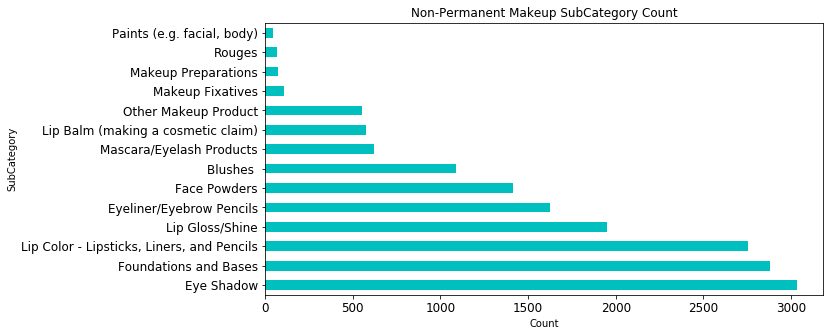

In [383]:
fig, ax = plt.subplots(figsize = (10,5))
datasub['SubCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Non-Permanent Makeup SubCategory Count')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

Text(0, 0.5, 'SubCategory')

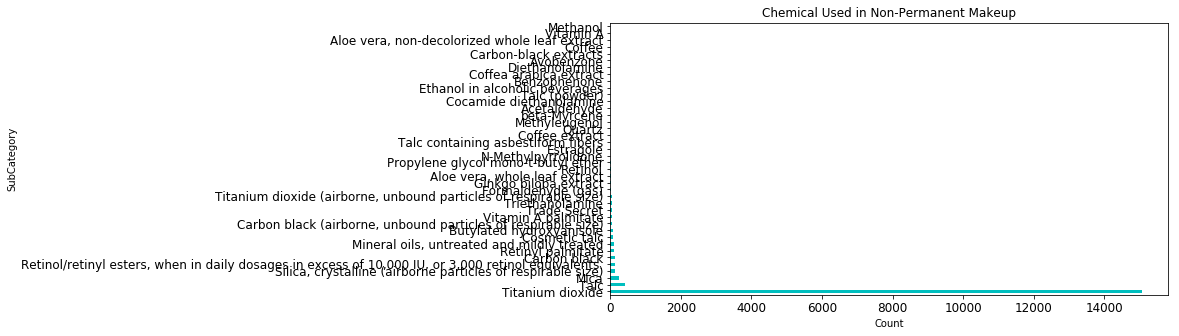

In [396]:
#most used chemical in non-permanent make up
fig, ax = plt.subplots(figsize = (10,5))
datasub['ChemicalName'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Chemical Used in Non-Permanent Makeup')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

In [385]:
data[['CDPHId','ProductName','CSFId','CSF', 'PrimaryCategory', 'SubCategory','ChemicalName', 'InitialDateReported']].tail(60)

,CDPHId,ProductName,CSFId,CSF,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported
107452,40645,No7 Protect & Perfect Advanced All in One Foun...,63164.0,Deep Honey,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13
107453,40645,No7 Protect & Perfect Advanced All in One Foun...,63164.0,Deep Honey,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13
107454,40645,No7 Protect & Perfect Advanced All in One Foun...,63165.0,Toffee,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,2019-12-13
107455,40645,No7 Protect & Perfect Advanced All in One Foun...,63165.0,Toffee,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,2019-12-13
107456,40645,No7 Protect & Perfect Advanced All in One Foun...,63165.0,Toffee,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13
107457,40645,No7 Protect & Perfect Advanced All in One Foun...,63165.0,Toffee,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13
107458,40645,No7 Protect & Perfect Advanced All in One Foun...,63166.0,Chestnut,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,2019-12-13
107459,40645,No7 Protect & Perfect Advanced All in One Foun...,63166.0,Chestnut,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,2019-12-13
107460,40645,No7 Protect & Perfect Advanced All in One Foun...,63166.0,Chestnut,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13
107461,40645,No7 Protect & Perfect Advanced All in One Foun...,63166.0,Chestnut,Sun-Related Products,Sunscreen (making a cosmetic claim),Titanium dioxide,2019-12-13


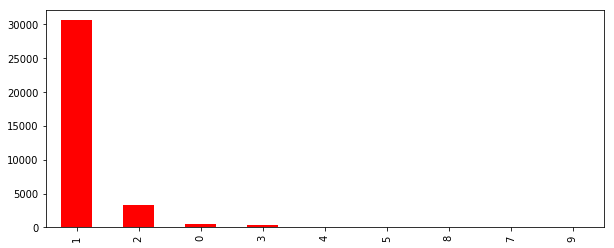

In [386]:
fig, ax = plt.subplots(figsize = (10,4))
cgroup['ChemicalCount'].value_counts().plot(kind='bar', color='r')

In [21]:
data['CompanyId'].nunique() 
#unique id and unique name counts are different, ID for same company name are sometimes different

621

In [22]:
data['CompanyName'].nunique()
#we can use company's name column instead but need to standardize first

592

In [23]:
sorted(data['CompanyName'].unique())

['2355644 Ontario Inc.',
 'A. P. Deauville, LLC',
 'ACQUA DI PARMA',
 'AFFLINK',
 'AG PROFESSIONAL HAIR CARE PRODUCTS LTD',
 'ALBION COSMETICS (America), Inc.',
 'ALPHAEON Corporation',
 'AMCO International',
 'AMOREPACIFIC US INC.',
 'ANC SPA INC',
 'ANTONIO PUIG S.A.',
 'APLICARE, INC',
 'AROMCA S.A',
 'Access Business Group International, LLC',
 'Added Extras LLC',
 'Advanced Aesthetics, Inc.',
 'Aesop USA Inc.',
 'Alberto Culver',
 'Alberto Culver USA, Inc.',
 'Alessandro International GmbH',
 'Alfalfa Nail Supply, Inc.',
 'Allure Labs, Inc.',
 'Aloe Vera of America, Inc.',
 'Aloecare International, LLC',
 'Aloette Cosmetics Inc.',
 'Alqvimia',
 'American Consumer Products',
 'American Consumer Products, LLC',
 'American International Industries',
 'Amway Corporation',
 'Anastasia Beverly Hills, LLC',
 'Apollo Health and Beauty Care',
 'Apollo Health and Beauty Care Inc.',
 'Aramis Inc.',
 'Arbonne International LLC',
 'Arcadia Beauty Labs LLC',
 'Arcadia Beauty Labs, LLC',
 'Archi

In [24]:
#there are still a lot of same companny names, some with space, comma, dot, some without but basically the same company. How to deal with it?


In [25]:
data['CompanyId'] = data['CompanyId'].astype(str)

In [26]:
com = data[['CompanyId','CompanyName']].drop_duplicates()
com.sort_values(['CompanyName']).head(60)
#from this table, let's use company name and drop company's id and we will standardize the companyname column 

,CompanyId,CompanyName
88196,1222,2355644 Ontario Inc.
45346,754,"A. P. Deauville, LLC"
86115,1206,ACQUA DI PARMA
12334,209,AFFLINK
32946,478,AG PROFESSIONAL HAIR CARE PRODUCTS LTD
88221,1228,"ALBION COSMETICS (America), Inc."
72770,1073,ALPHAEON Corporation
1398,82,AMCO International
72938,1076,AMOREPACIFIC US INC.
25198,350,ANC SPA INC


Trying to find out why same EXACT company name has different ID!?, we'll just go by company name then
for example 
42272	716	Added Extras LLC
9791	157	Added Extras LLC
5573	118	Added Extras LLC

In [27]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='716'] #18 rows brand name include wal-mart, glee, hot topic

/Users/suchaya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
42272,15006,Beauty Sweets Cosmetic Bag Gift Set,21009.0,purple,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),46,...,13463-67-7,23007,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42273,15007,Beauty Sweets Mega Cosmetic Set,21010.0,white,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23008,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42274,15007,Beauty Sweets Mega Cosmetic Set,23573.0,Berry,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23008,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42275,15007,Beauty Sweets Mega Cosmetic Set,23734.0,Berry,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23008,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42276,15008,Strawberry Shortcake Lip Gloss Gift Bag Set,21011.0,Pink,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23009,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42277,15008,Strawberry Shortcake Lip Gloss Gift Bag Set,21012.0,pink,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23009,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42278,15008,Strawberry Shortcake Lip Gloss Gift Bag Set,23572.0,Strawberry,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23009,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
42279,15008,Strawberry Shortcake Lip Gloss Gift Bag Set,23733.0,Strawberry,716,Added Extras LLC,Wal-Mart,44,Makeup Products (non-permanent),52,...,13463-67-7,23009,Titanium dioxide,2010-08-03,2010-12-30,NaT,2010-08-03,2010-08-03,NaT,1
43638,15451,Quinn Cosmetic book,21724.0,white AB,716,Added Extras LLC,Glee,44,Makeup Products (non-permanent),48,...,13463-67-7,23754,Titanium dioxide,2010-10-18,2010-12-30,NaT,2010-10-18,2010-10-18,NaT,1
43639,15452,9 pk Mini Lipglosss,21725.0,multi,716,Added Extras LLC,Glee,44,Makeup Products (non-permanent),52,...,13463-67-7,23755,Titanium dioxide,2010-10-19,2010-12-30,NaT,2010-10-19,2010-10-19,NaT,1


In [28]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='157'] #193 rows - Hot Topic, 

/Users/suchaya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
9791,2687,Baked Eyeshadow,4866.0,Black 03,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,4173,Titanium dioxide,2009-10-07,2010-12-30,NaT,2009-10-07,2009-10-07,NaT,1
9792,2687,Baked Eyeshadow,4867.0,Teal 02,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,4173,Titanium dioxide,2009-10-07,2010-12-30,NaT,2009-10-07,2009-10-07,NaT,1
9793,2687,Baked Eyeshadow,4868.0,Pink 05,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,4173,Titanium dioxide,2009-10-07,2010-12-30,NaT,2009-10-07,2009-10-07,NaT,1
9794,2687,Baked Eyeshadow,4869.0,Copper 04,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,4173,Titanium dioxide,2009-10-07,2010-12-30,NaT,2009-10-07,2009-10-07,NaT,1
10996,2776,Square Liquid Eyeliner,NaN,NaN,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),46,...,13463-67-7,4458,Titanium dioxide,2009-10-08,2009-10-08,NaT,2009-10-08,2009-10-08,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42858,15176,Plexi Eyeshadow Compact,21272.0,yellow,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,23386,Titanium dioxide,2010-08-25,2010-12-30,NaT,2010-08-25,2010-08-25,NaT,1
42859,15176,Plexi Eyeshadow Compact,21273.0,orange,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,23386,Titanium dioxide,2010-08-25,2010-12-30,NaT,2010-08-25,2010-08-25,NaT,1
42860,15176,Plexi Eyeshadow Compact,21274.0,brown,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,23386,Titanium dioxide,2010-08-25,2010-12-30,NaT,2010-08-25,2010-08-25,NaT,1
42861,15176,Plexi Eyeshadow Compact,21275.0,tan,157,Added Extras LLC,Hot Topic,44,Makeup Products (non-permanent),48,...,13463-67-7,23386,Titanium dioxide,2010-08-25,2010-12-30,NaT,2010-08-25,2010-08-25,NaT,1


In [29]:
data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='118']['BrandName'].unique() #87rows

/Users/suchaya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['Topps', 'Hello Kitty', 'Dead Sea', 'Aquafina', 'Urban Outfitters',
       'Cutie Boutique', 'Popsicle', "It's Happy Bunny", 'Skin Vitamins',
       'Bratz', 'Hello Kitty, Bratz, Strawberry Shortcake, Bakugan,',
       'Bratz, Bakugan, Hello Kitty, Strawberry Shortcake',
       'Bratz, Strawberry Shortcake'], dtype=object)

In [30]:
data.head(60) 

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT,1


Questions
- do i treat same product, different csf as different products from the company? - I think i should
- but for the same product that has identical info except the chemical - i should combine it. How tho? covert chemical name column to list?

In [31]:
#group by product name and company because they list same product twice for having different chemicals
group1 = data.groupby(['CDPHId','CompanyName','ProductName','ChemicalName'])

In [32]:
group1.sum()

CSFId  \
CDPHId CompanyName                         ProductName                                        ChemicalName                        
2      New Avon LLC                        ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   Titanium dioxide              0.0   
3      J. Strickland & Co.                 Glover's Medicated Shampoo                         Distillates (coal tar)        0.0   
                                                                                              Estragole                     0.0   
4      New Avon LLC                        PRECISION GLIMMER EYE LINER-ALL SHADES �           Titanium dioxide              0.0   
5      New Avon LLC                        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �        Titanium dioxide              0.0   
...                                                                                                                         ...   
40655  Revlon Consumer Product Corporation CREATIVE NAIL DESIGN SHELLAC NAIL ENAMEL DARK LAVA Carbon black              63170.0   
40657  Revlon Consumer Product Corporation Creative Nail Design Shellac Nail Enamel CANDIED   Titanium dioxide        2148375.0   
40658  Revlon Consumer Product Corporation Revlon Glow Balm PeonyGlow                         Titanium dioxide          63205.0   
40659  Revlon Consumer Product Corporation Revlon Kiss Sugar Scrub Sweet Mint                 Titanium dioxide              0.0   
40660  Revlon Consumer Product Corporation REVLON COLORSTAY EYELINER GOLD                     Titanium dioxide         252830.0   

                                                                                                                      PrimaryCategoryId  \
CDPHId CompanyName                         ProductName                                        ChemicalName                                
2      New Avon LLC                        ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   Titanium dioxide                       44   
3      J. Strickland & Co.                 Glover's Medicated Shampoo                         Distillates (coal tar)                 18   
                                                                                              Estragole                              18   
4      New Avon LLC                        PRECISION GLIMMER EYE LINER-ALL SHADES �           Titanium dioxide                       44   
5      New Avon LLC                        AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �        Titanium dioxide                       44   
...                                                                                                                                 ...   
40655  Revlon Consumer Product Corporation CREATIVE NAIL DESIGN SHELLAC NAIL ENAMEL DARK LAVA Carbon black                           59   
40657  Revlon Consumer Product Corporation Creative Nail Design Shellac Nail Enamel CANDIED   Titanium dioxide                     2006   
40658  Revlon Consumer Product Corporation Revlon Glow Balm PeonyGlow                         Titanium dioxide                       44   
40659  Revlon Consumer Product Corporation Revlon Kiss Sugar Scrub Sweet Mint                 Titanium dioxide                       44   
40660  Revlon Consumer Product Corporation REVLON COLORSTAY EYELINER GOLD                     Titanium dioxide                      176   

                                                                                                                      SubCategoryId  \
CDPHId CompanyName                         ProductName                                        ChemicalName                            
2      New Avon LLC                        ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES   Titanium dioxide                   53   
3      J. Strickland & Co.                 Glover's Medicated Shampoo                         Distillates (coal tar)             25   
                                                                      

In [33]:
data

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,Revlon Kiss Sugar Scrub Sweet Mint,NaN,NaN,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),58,...,13463-67-7,66554,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107508,40660,REVLON COLORSTAY EYELINER GOLD,63206.0,BLACK,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107509,40660,REVLON COLORSTAY EYELINER GOLD,63207.0,BRONZE,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1
107510,40660,REVLON COLORSTAY EYELINER GOLD,63208.0,SILVER,23,Revlon Consumer Product Corporation,Revlon Colorstay,44,Makeup Products (non-permanent),46,...,13463-67-7,66555,Titanium dioxide,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,1


In [34]:
data.groupby(['CompanyName','ProductName']).count().head(50)

CDPHId  \
CompanyName                            ProductName                                                  
2355644 Ontario Inc.                   Sahajan Radiance Ayurvedic Blend Face Serum              1   
A. P. Deauville, LLC                   Power Stick Deodorant Body Spray                         1   
ACQUA DI PARMA                         BALSAMO ALLA COLONIA - AFTER SHAVE BALM                  1   
                                       COLLEZIONE BARBIERE GEL EMOLLIENTE - SHAVING GEL         1   
                                       CREMA ALLA COLONIA - BODY CREAM                          1   
                                       GELSOMINO NOBILE CREMA RADIOSA PER IL CORPO - B...       1   
                                       GELSOMINO NOBILE GEL RADIOSO PER IL CORPO - RAD...       1   
                                       IRIS NOBILE Gel Prezioso per il Bagno - Preciou...       1   
                                       LATTE PER IL CORPO ALLA COLONIA - BODY LOTION            1   
                                       MAGNOLIA NOBILE CREMA SUBLIME PER IL CORPO -  S...       1   
                                       MAGNOLIA NOBILE Gel sublime per il bagno Sublim...       1   
                                       PEONIA NOBILE Crema Lussuosa per il Corpo - Lux...       1   
                                       PEONIA NOBILE Gel Lussuoso per il bagno - Luxur...       1   
                                       PROFUMO CREMA SUNTUOSA PER IL CORPO - SUMPTUOUS...       1   
                                       ROSA NOBILE Gel Vellutato per il Bagno -  Velve...       1   
                                       SAPONE ALLA COLONIA - SOAP                               1   
AFFLINK                                Amber Antimicrobial Lotion Soap                          1   
                                       Antimicrobial Lotion Soap                                1   
                                       Chemicals Pink Hand Soap                                 1   
                                       Hand Care System Antimicrobial Hand Soap                 1   
                                       Hand Care System Lotion Hand Soap                        1   
                                       Hand Care System Pink Satin Lotionized Soap              1   
                                       Multi-Pupose Hand Cleaner                                1   
                                       Pink Pearl Lotion Soap                                   1   
AG PROFESSIONAL HAIR CARE PRODUCTS LTD CONTROL ANTI-DANDRUFF SHAMPOO                            1   
                                       PEPPERMINT WASH SHAMPOO                                  1   
                                       RENEW CLARIFYING SHAMPOO                                 1   
                                       Sterling Silver Shampoo                                  1   
ALBION COSMETICS (America), Inc.       ALBION  SKIN  CONDITIONER  CLEANSING  BAR                1   
                                       PAUL  &  JOE  MOISTURIZING  FOUNDATION  PRIMER ...       1   
                                       PAUL  &  JOE  MOISTURIZING  FOUNDATION  PRIMER ...       1   
                                       PAUL  &  JOE  MOISTURIZING  FOUNDATION  PRIMER ...       1   
ALPHAEON Corporation                   RHA Advanced Normal to Combination Skin                  2   
                                       RHA Eyes                                                 2   
AMCO International                     Attraction Extreme Pink Nail Powder                      1   
                                       Attraction Nail Liquid                                   1   
                                       Attraction Nail Powders                                  7   
                                       Attraction Pink Masque Powder                            1   
                                       Attraction P

In [35]:
# need to see distinct combination of CompId and CompName to find a reason why the unique counts are different

In [36]:
data['ProductName'].nunique()
#31838 products were reported

31838

In [37]:
data['MostRecentDateReported'].sort_values() # problem - date dtype is object/ not date!

1        2009-07-01
2        2009-07-01
36       2009-08-11
37       2009-08-11
46       2009-08-18
            ...    
107480   2019-12-16
107481   2019-12-16
107482   2019-12-16
107471   2019-12-16
107511   2019-12-16
Name: MostRecentDateReported, Length: 107512, dtype: datetime64[ns]

In [38]:
data['InitialDateReported'].sort_values()

0        2009-06-17
1        2009-07-01
2        2009-07-01
3        2009-07-09
4        2009-07-09
            ...    
107481   2019-12-16
107482   2019-12-16
107483   2019-12-16
107473   2019-12-16
107511   2019-12-16
Name: InitialDateReported, Length: 107512, dtype: datetime64[ns]

In [39]:
#earliest initialdatereported is 2009-06-17, latest is  2019-12-16
#earliest mostrecentdatereported is 2009-07-01, latest is 2019-12-16

In [40]:
data.head(60)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT,1
